In [3]:
pip install pandas numpy matplotlib seaborn networkx 

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset from OECD STIP Survey with error handling
# url = "https://stip-pp.oecd.org/assets/downloads/STIP_Survey.csv"
url = "STIP_Survey.csv"
# Use low_memory=False to handle parsing issues and add error handling
try:
    stip_survey = pd.read_csv(url, sep="|", low_memory=False)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Trying alternative approach...")
    
    # Alternative approach with different parameters
    try:
        stip_survey = pd.read_csv(url, sep="|", low_memory=False, on_bad_lines='skip')
        print("Data loaded with error handling!")
    except Exception as e2:
        print(f"Alternative approach also failed: {e2}")
        raise

# Display basic information about the dataset
print("\nNumber of rows in the dataset:", len(stip_survey))
print("\nFirst 5 rows of the dataset:")
print(stip_survey.head())

Error loading data: Error tokenizing data. C error: Expected 519 fields in line 15823, saw 520

Trying alternative approach...
Data loaded with error handling!

Number of rows in the dataset: 13905

First 5 rows of the dataset:
                                        InitiativeID          SurveyYear  \
0                              Policy Initiative URI  Year of the survey   
1  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
2  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
3  http://stip.oecd.org/2025/data/policyInitiativ...                2025   
4  http://stip.oecd.org/2025/data/policyInitiativ...                2025   

               CreatedInSurvey                  LastModifiedInSurvey  \
0  Creation date in the survey  Last modification date in the survey   
1         2017-07-31T12:11:38Z                  2024-06-21T08:15:42Z   
2         2017-07-31T12:11:38Z                  2024-06-21T08:15:42Z   
3         2017-07-31T12:36:

In [5]:
#To facilitate working with the dataset, we generate a separate 'Codebook' dataframe listing the column names and the detail given in the first row, for variables on themes and direct beneficiaries

# 1. Get column names (Code) and the first row (Meaning) from the DataFrame
columns = stip_survey.columns
meanings = stip_survey.iloc[0].values

# 2. Create a DataFrame pairing each column name with its description
codebook = pd.DataFrame({
    "Code": columns,
    "Meaning": meanings
})

# 3. Filter only columns whose names start with "TH" or "TG" (policy themes and direct beneficiaries)
codebook = codebook[codebook["Code"].str.match(r"^TH|^TG")].reset_index(drop=True)

# 4. Display the first 10 rows of the codebook
codebook.head(10)

,Code,Meaning
0,TH101,Net zero transitions policy debates
1,TH102,Government capabilities for net zero transitions
2,TH103,Net zero transitions in transport and mobility
3,TH104,Net zero transitions in food and agriculture
4,TH106,Digital transformation of research-performing ...
5,TH107,Open and enhanced access to publications
6,TH108,Enhanced access to data and software
7,TH109,Research security
8,TH110,Dynamic skills and capabilities for policymaking
9,TH111,Strategic Autonomy and promotion of critical t...


In [6]:
# Data preprocessing
# Remove the description row to keep only observational data
stip_survey = stip_survey.iloc[1:].reset_index(drop=True)

# Convert theme and target group columns to numeric format
th_tg_cols = [col for col in stip_survey.columns if col.startswith('TH') or col.startswith('TG')]
stip_survey[th_tg_cols] = stip_survey[th_tg_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a separate DataFrame with unique initiatives only
stip_survey_unique = stip_survey.drop_duplicates(subset=['InitiativeID']).copy()

print("Data loaded and prepared.")
print(f"Total policy instruments (rows): {len(stip_survey)}")
print(f"Total unique policy initiatives: {len(stip_survey_unique)}")
stip_survey_unique.head()

Data loaded and prepared.
Total policy instruments (rows): 13904
Total unique policy initiatives: 9431


,InitiativeID,SurveyYear,CreatedInSurvey,LastModifiedInSurvey,NameEnglish,CountryLabel,CountryCode,NameOriginalLanguage,Acronym,StartDateYear,...,F9:V294,F9:V295,F98:V670,F98:V671,F98:V672,F98:V673,F99:V674,F99:V675,F99:V676,F99:V677
0,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:11:38Z,2024-06-21T08:15:42Z,INTER,Luxembourg,LUX,NaN,NaN,2006,...,0,0,0,1,0,0,0,0,0,1
2,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T12:36:36Z,2023-02-06T21:06:10Z,CORE,Luxembourg,LUX,NaN,NaN,2007,...,0,0,0,0,0,0,0,0,0,0
3,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:20:00Z,2023-02-06T21:06:00Z,Open Access Fund,Luxembourg,LUX,Open Access Fund,NaN,2017,...,0,0,0,0,0,0,0,0,0,0
5,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T14:40:34Z,2023-06-07T17:03:59Z,Integrated BioBank of Luxembourg,Luxembourg,LUX,NaN,IBBL,2010,...,0,0,0,0,0,0,0,0,0,0
6,http://stip.oecd.org/2025/data/policyInitiativ...,2025,2017-07-31T15:24:56Z,2023-02-06T21:06:11Z,THE 3RD INDUSTRIAL REVOLUTION STRATEGY,Luxembourg,LUX,"Etude stratégique """"Troisième Révolution Indus...",NaN,2016,...,0,0,0,0,0,0,0,0,0,0


Top 10 countries by number of initiatives for 'Financial support to business R&D':
CountryLabel
Türkiye                       77
Poland                        74
Spain                         61
Portugal                      57
Germany                       47
United States                 43
Hungary                       33
Austria                       30
Belgium - Brussels Capital    24
Korea                         22
Name: count, dtype: int64


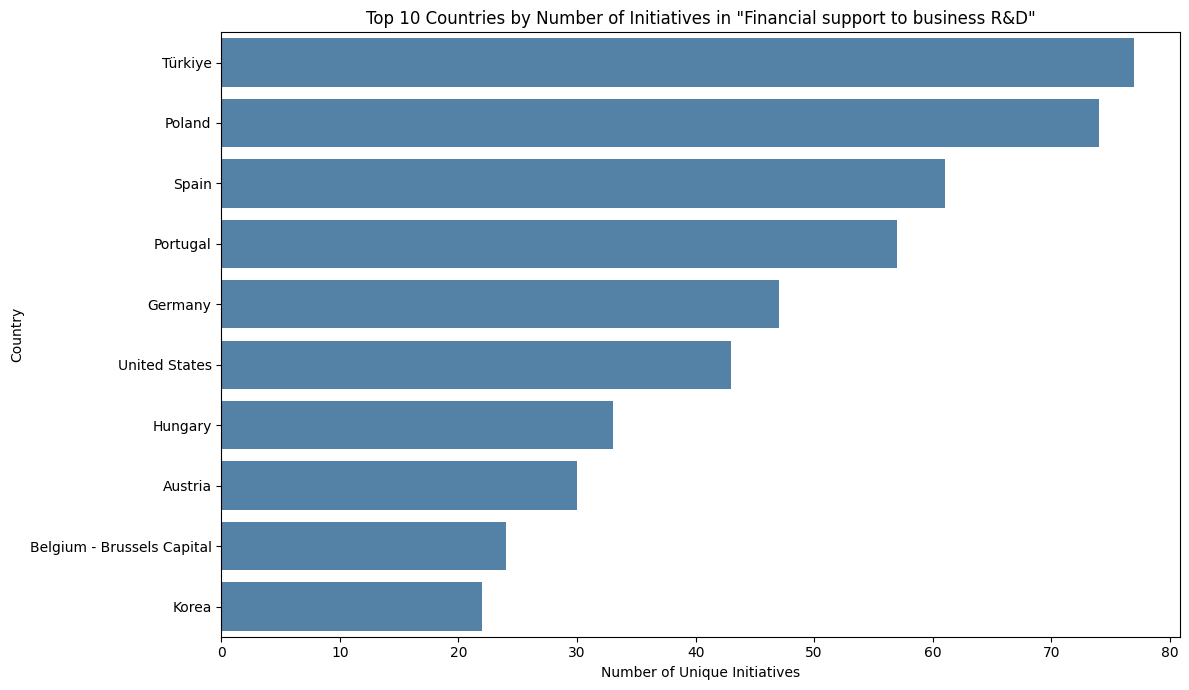

In [8]:
th31_initiatives = stip_survey_unique[stip_survey_unique['TH31'] == 1]

# 2. Count the number of initiatives per country and get the top 10
top_countries_th31 = th31_initiatives['CountryLabel'].value_counts().head(10)

# 3. Print the resulting counts
print("Top 10 countries by number of initiatives for 'Financial support to business R&D':")
print(top_countries_th31)

# 4. Visualize the results using a bar chart for better comparison
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries_th31.values, y=top_countries_th31.index, color='steelblue')
plt.title('Top 10 Countries by Number of Initiatives in "Financial support to business R&D"')
plt.xlabel('Number of Unique Initiatives')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Available themes in dataset: 17 out of 17
Available themes: ['TH111', 'TH110', 'TH112', 'TH34', 'TH13', 'TH15', 'TH22', 'TH31', 'TH32', 'TH82', 'TH91', 'TH92', 'TH103', 'TH104', 'TH89', 'TH106', 'TH109']


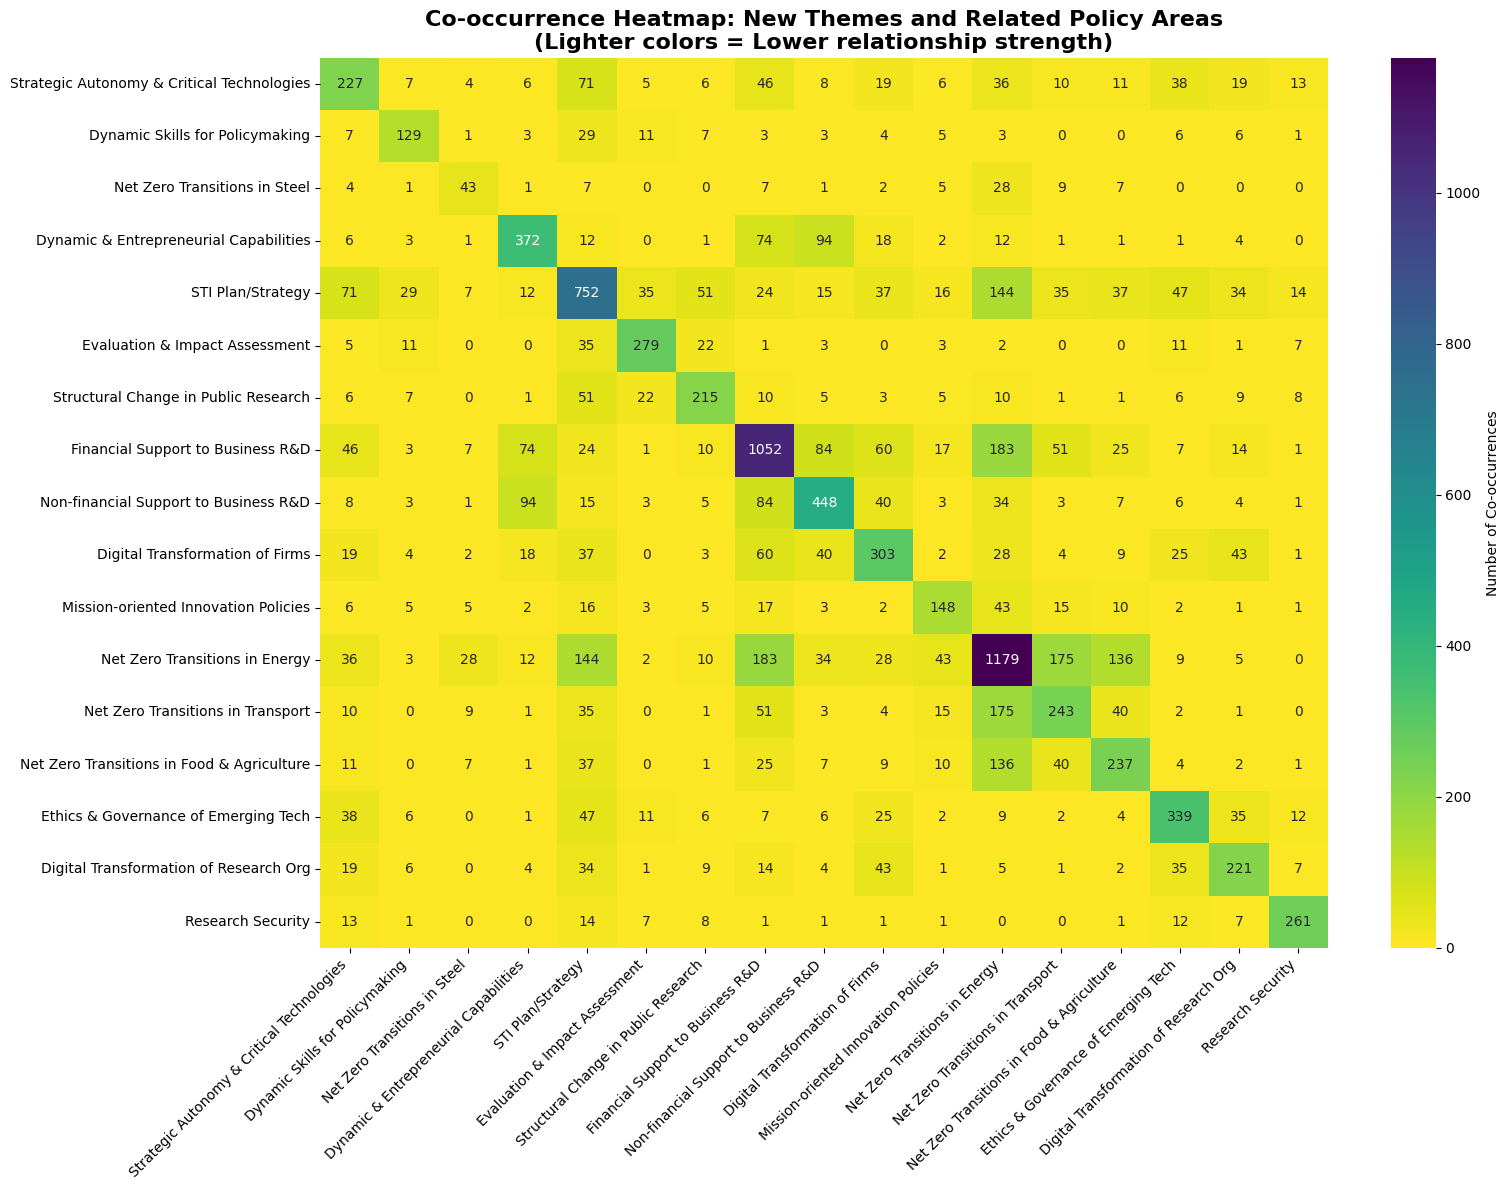


Co-occurrence Analysis Summary:
New Themes (TH111, TH110, TH112) co-occurrence patterns:

Strategic Autonomy & Critical Technologies:
Top 5 co-occurring themes:
  1. STI Plan/Strategy: 71 initiatives
  2. Financial Support to Business R&D: 46 initiatives
  3. Ethics & Governance of Emerging Tech: 38 initiatives
  4. Net Zero Transitions in Energy: 36 initiatives
  5. Digital Transformation of Firms: 19 initiatives

Dynamic Skills for Policymaking:
Top 5 co-occurring themes:
  1. STI Plan/Strategy: 29 initiatives
  2. Evaluation & Impact Assessment: 11 initiatives
  3. Strategic Autonomy & Critical Technologies: 7 initiatives
  4. Structural Change in Public Research: 7 initiatives
  5. Ethics & Governance of Emerging Tech: 6 initiatives

Net Zero Transitions in Steel:
Top 5 co-occurring themes:
  1. Net Zero Transitions in Energy: 28 initiatives
  2. Net Zero Transitions in Transport: 9 initiatives
  3. Financial Support to Business R&D: 7 initiatives
  4. STI Plan/Strategy: 7 initiat

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the governance themes to analyze (use correct codes)
# New themes + related themes with high co-occurrence potential
governance_themes = [
    # New themes
    'TH111',  # Strategic autonomy and promotion of critical technologies
    'TH110',  # Dynamic skills and capabilities for policymaking
    'TH112',  # Net zero transitions in steel
    
    # Related themes with high co-occurrence potential
    'TH34',   # Dynamic and entrepreneurial capabilities and culture
    'TH13',   # STI plan or strategy
    'TH15',   # Evaluation and impact assessment
    'TH22',   # Structural change in the public research system
    
    # Additional themes that likely co-occur with new themes
    'TH31',   # Financial support to business R&D and innovation
    'TH32',   # Non-financial support to business R&D and innovation
    'TH82',   # Digital transformation of firms
    'TH91',   # Mission-oriented innovation policies
    'TH92',   # Net zero transitions in energy
    'TH103',  # Net zero transitions in transport and mobility
    'TH104',  # Net zero transitions in food and agriculture
    'TH89',   # Ethics and governance of emerging technologies
    'TH106',  # Digital transformation of research-performing organisations
    'TH109'   # Research security
]

# 2. English labels for the heatmap
label_mapping = {
    # New themes
    'TH111': 'Strategic Autonomy & Critical Technologies',
    'TH110': 'Dynamic Skills for Policymaking',
    'TH112': 'Net Zero Transitions in Steel',
    
    # Related themes
    'TH34': 'Dynamic & Entrepreneurial Capabilities',
    'TH13': 'STI Plan/Strategy',
    'TH15': 'Evaluation & Impact Assessment',
    'TH22': 'Structural Change in Public Research',
    
    # Additional related themes
    'TH31': 'Financial Support to Business R&D',
    'TH32': 'Non-financial Support to Business R&D',
    'TH82': 'Digital Transformation of Firms',
    'TH91': 'Mission-oriented Innovation Policies',
    'TH92': 'Net Zero Transitions in Energy',
    'TH103': 'Net Zero Transitions in Transport',
    'TH104': 'Net Zero Transitions in Food & Agriculture',
    'TH89': 'Ethics & Governance of Emerging Tech',
    'TH106': 'Digital Transformation of Research Org',
    'TH109': 'Research Security'
}

# 3. Check which themes are available in the dataset
available_themes = [theme for theme in governance_themes if theme in stip_survey_unique.columns]
print(f"Available themes in dataset: {len(available_themes)} out of {len(governance_themes)}")
print(f"Available themes: {available_themes}")

# 4. Create a DataFrame containing only available theme columns
governance_df = stip_survey_unique[available_themes].copy()
governance_df.columns = [label_mapping[col] for col in governance_df.columns]

# 5. Calculate the co-occurrence matrix
co_occurrence_matrix = governance_df.T.dot(governance_df)

# 6. Draw the heatmap with inverted color scheme
plt.figure(figsize=(16, 12))
sns.heatmap(co_occurrence_matrix, 
            annot=True, 
            fmt='d', 
            cmap='viridis_r',  # Blue color scheme inverted
            cbar_kws={'label': 'Number of Co-occurrences'})
plt.title('Co-occurrence Heatmap: New Themes and Related Policy Areas\n(Lighter colors = Lower relationship strength)', 
          fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# 7. Print summary of co-occurrence patterns
print("\nCo-occurrence Analysis Summary:")
print("=" * 60)
print("New Themes (TH111, TH110, TH112) co-occurrence patterns:")

# Focus on new themes
new_themes = ['TH111', 'TH110', 'TH112']
for new_theme in new_themes:
    if new_theme in available_themes:
        theme_label = label_mapping[new_theme]
        print(f"\n{theme_label}:")
        
        # Get co-occurrence values for this theme
        theme_co_occurrences = co_occurrence_matrix.loc[label_mapping[new_theme]]
        
        # Sort by co-occurrence value (descending)
        sorted_co_occurrences = theme_co_occurrences.sort_values(ascending=False)
        
        # Show top 5 co-occurring themes
        print("Top 5 co-occurring themes:")
        # 修正: .items()を使用してキーと値のペアを取得
        for i, (theme, value) in enumerate(sorted_co_occurrences.head(6)[1:].items(), 1):
            print(f"  {i}. {theme}: {value} initiatives")

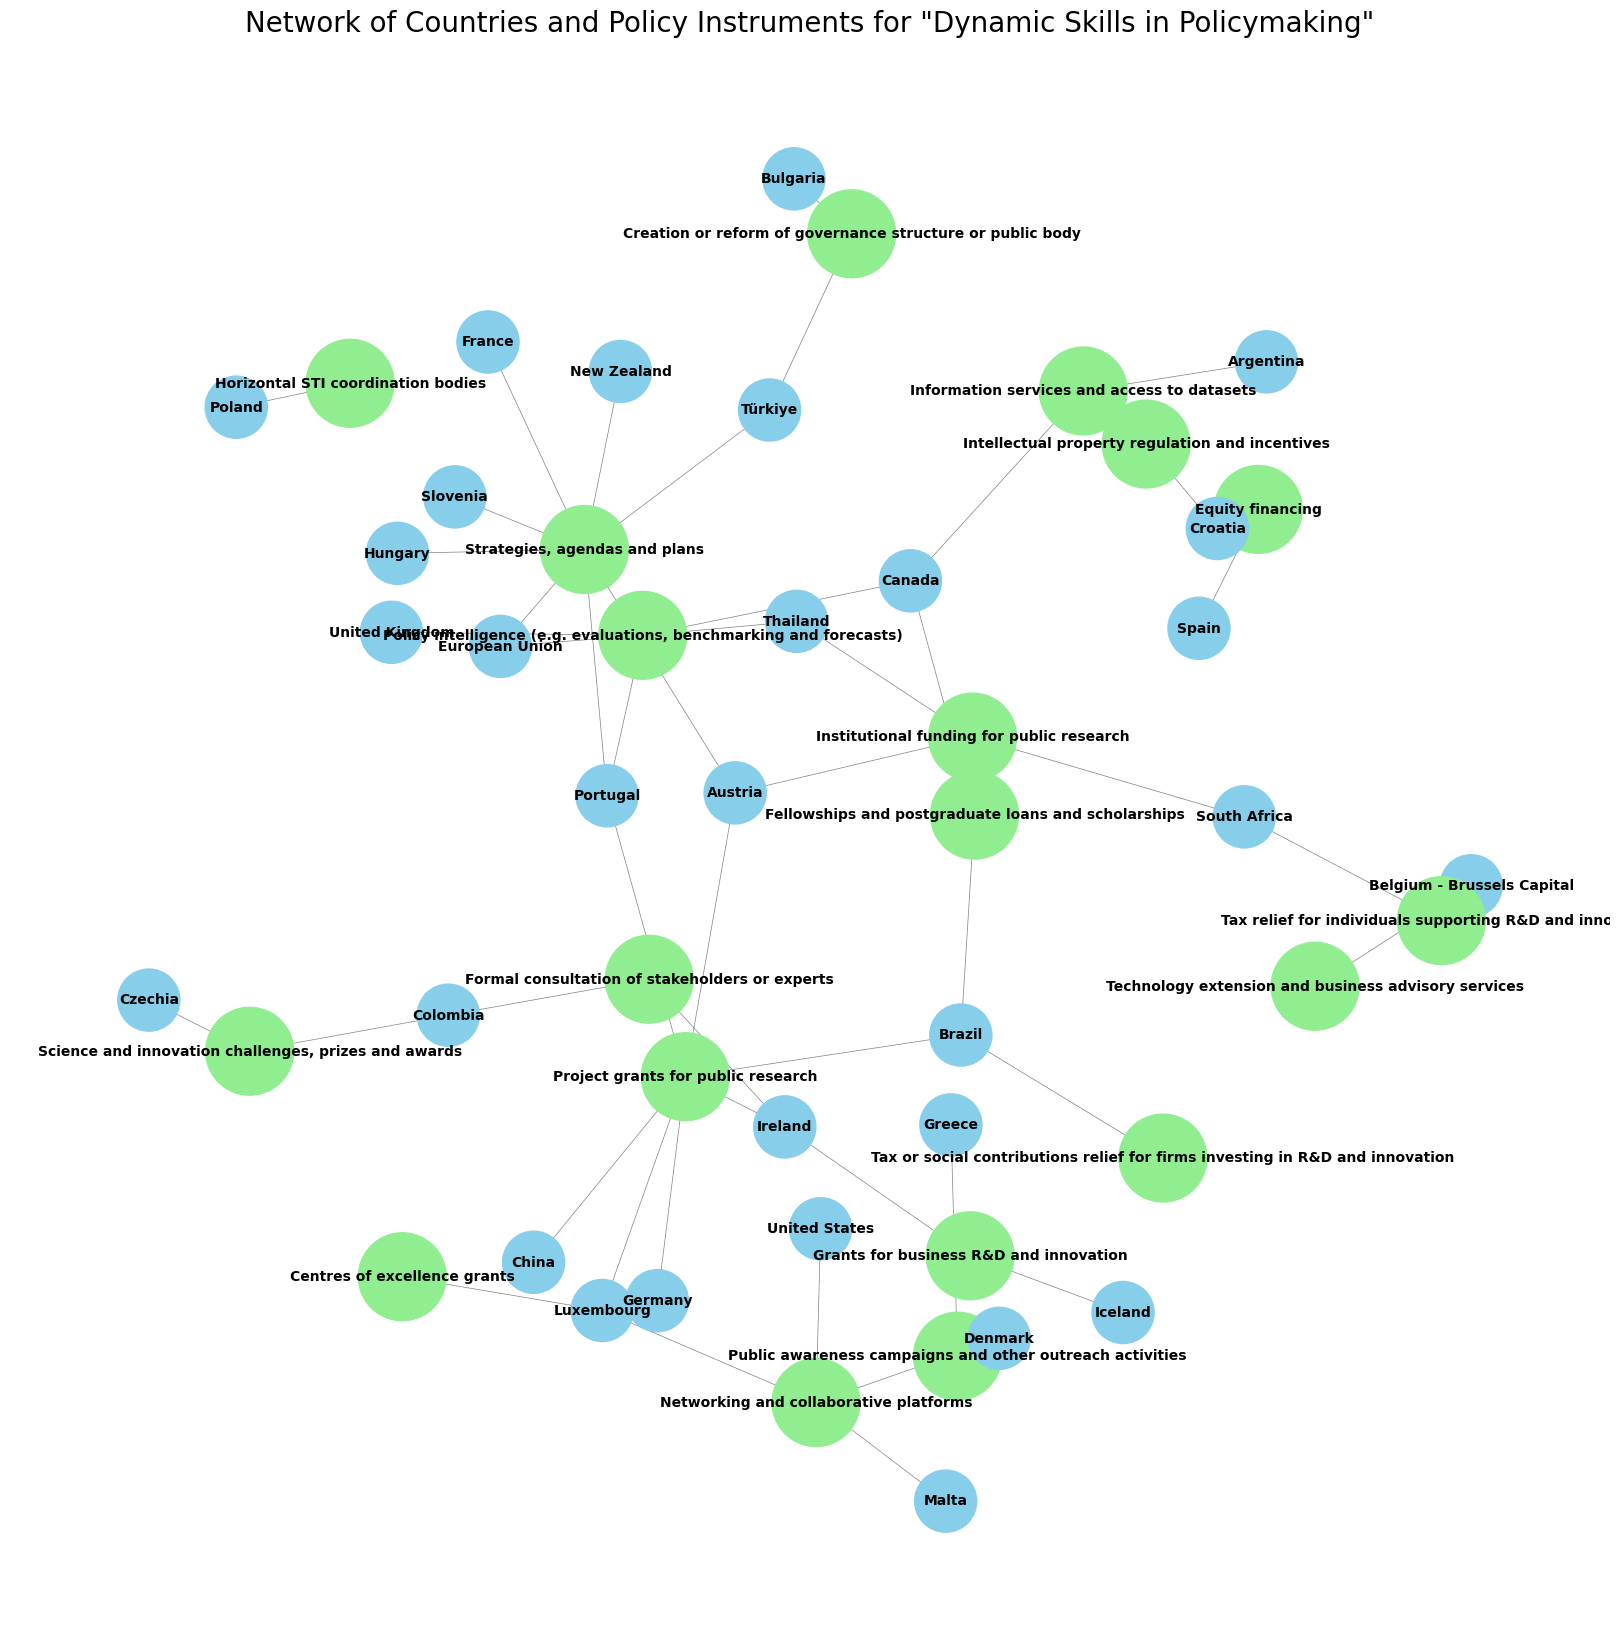

In [ ]:


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Filter for instruments belonging to initiatives with the target theme.
dynamic_skills_instruments = stip_survey[stip_survey['TH34'] == 1]

# 2. Create a DataFrame of the relationships (edges) between countries and instruments.
#    We drop any rows with missing values in these key columns.
edges = dynamic_skills_instruments[['CountryLabel', 'InstrumentTypeLabel']].dropna().reset_index(drop=True)

# 3. Create a graph object from this list of edges using the networkx library.
G = nx.from_pandas_edgelist(edges, source='CountryLabel', target='InstrumentTypeLabel')

# 4. Prepare for plotting by defining node properties.
plt.figure(figsize=(16, 16)) # Use a large figure size for clarity
pos = nx.spring_layout(G, k=0.4, iterations=50) # Position nodes using a force-directed layout

# Differentiate nodes by type (country vs. instrument) for better visual interpretation.
node_colors = []
node_sizes = []
country_nodes = edges['CountryLabel'].unique()

for node in G.nodes():
    if node in country_nodes:
        node_colors.append('skyblue') # Color for countries
        node_sizes.append(2000)
    else:
        node_colors.append('lightgreen') # Color for instruments
        node_sizes.append(4000) # Larger nodes for instrument labels

# 5. Draw the network graph.
nx.draw(G, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=node_sizes,
        font_size=10, 
        font_weight='bold', 
        edge_color='gray',
        width=0.5)

plt.title('Network of Countries and Policy Instruments for "Dynamic Skills in Policymaking"', size=20)
plt.show()


TH102: 228 initiatives found
TH92: 1101 initiatives found
TH103: 229 initiatives found
TH104: 220 initiatives found
TH112: 43 initiatives found


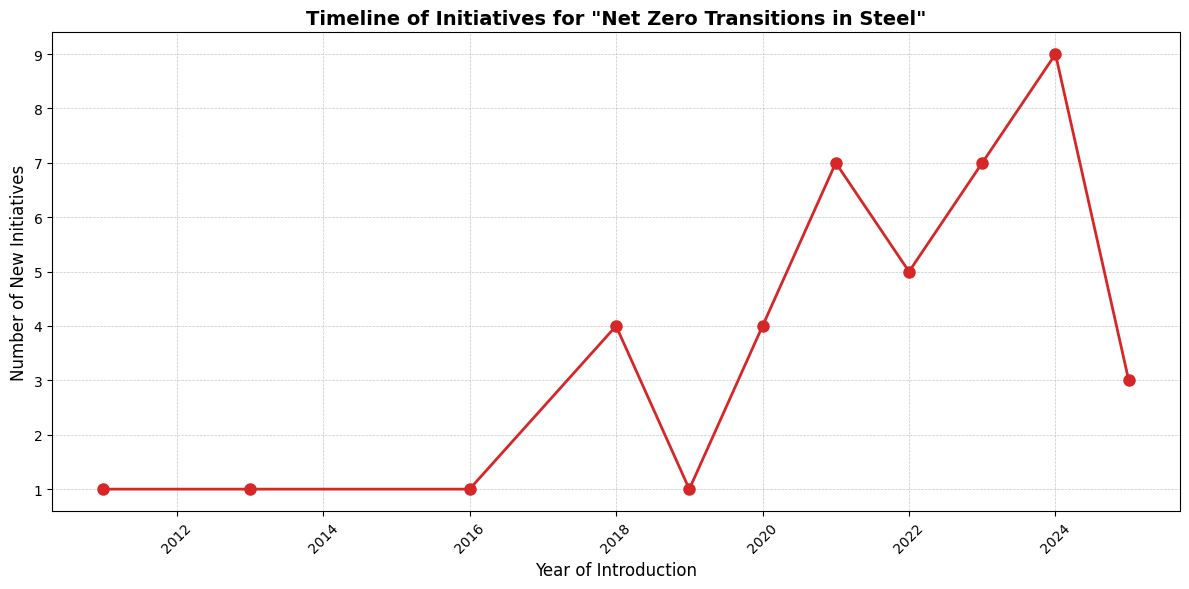

TH112 (Net Zero Transitions in Steel) Summary:
Total initiatives: 43
Years with initiatives: 11
Peak year: 2024 (9 initiatives)
Date range: 2011 - 2025


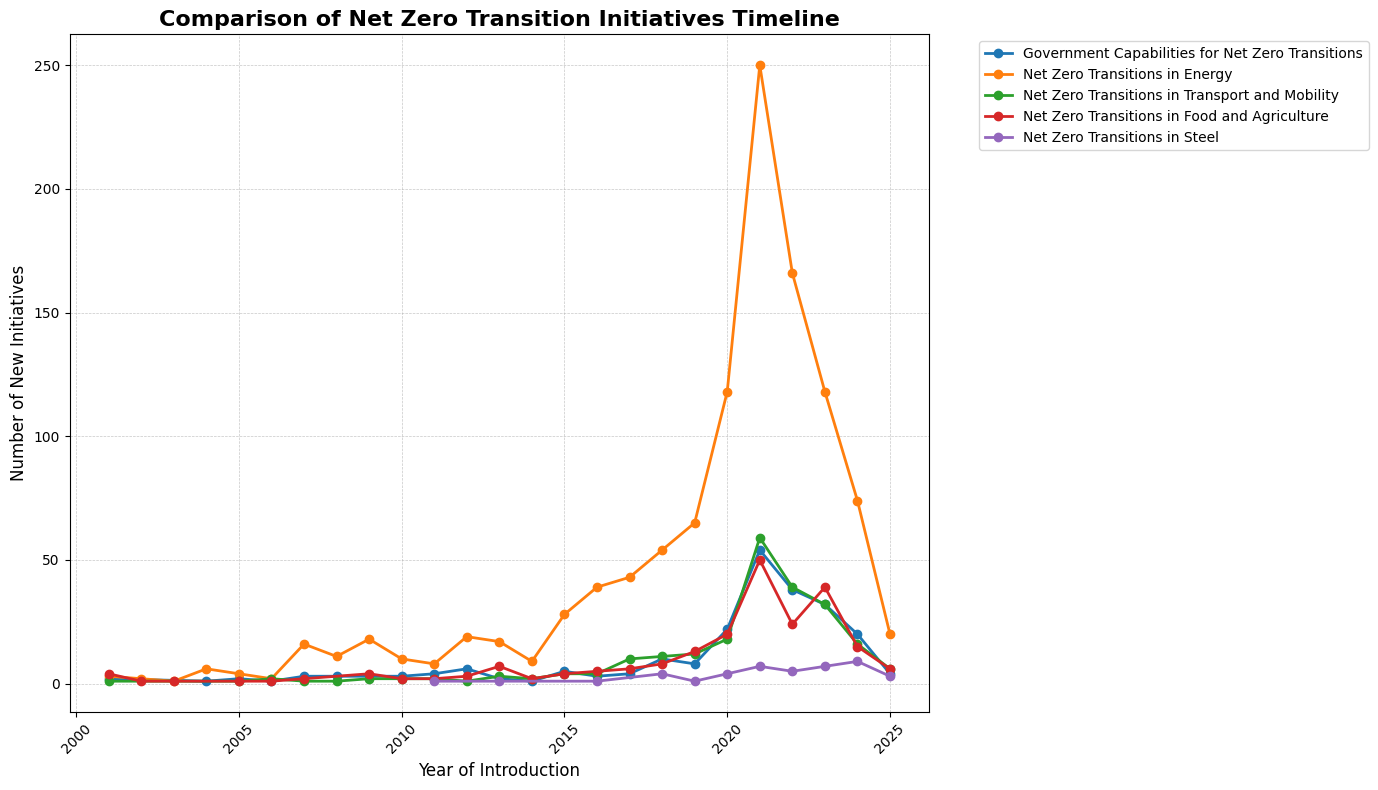


Summary of Net Zero Transition Initiatives:
Government Capabilities for Net Zero Transitions:
  Total initiatives: 228
  Years active: 22
  Peak year: 2021.0 (54 initiatives)

Net Zero Transitions in Energy:
  Total initiatives: 1101
  Years active: 25
  Peak year: 2021.0 (250 initiatives)

Net Zero Transitions in Transport and Mobility:
  Total initiatives: 229
  Years active: 22
  Peak year: 2021.0 (59 initiatives)

Net Zero Transitions in Food and Agriculture:
  Total initiatives: 220
  Years active: 23
  Peak year: 2021.0 (50 initiatives)

Net Zero Transitions in Steel:
  Total initiatives: 43
  Years active: 11
  Peak year: 2024 (9 initiatives)



In [15]:
# Net Zero Transitions Comparison Analysis
# Create timeline comparison for TH102, TH92, TH103, TH104, and TH112

# Theme codes and labels based on the CSV reference
theme_codes = {
    'TH102': 'Government Capabilities for Net Zero Transitions',
    'TH92': 'Net Zero Transitions in Energy', 
    'TH103': 'Net Zero Transitions in Transport and Mobility',
    'TH104': 'Net Zero Transitions in Food and Agriculture',
    'TH112': 'Net Zero Transitions in Steel'
}

# Collect timeline data for each theme
timeline_dict = {}
available_themes = []

for code, label in theme_codes.items():
    if code in stip_survey_unique.columns:
        available_themes.append(code)
        # Filter initiatives for this theme
        initiatives = stip_survey_unique[stip_survey_unique[code] == 1].copy()
        
        if len(initiatives) > 0:
            # Convert StartDateYear to numeric
            initiatives['StartDateYear'] = pd.to_numeric(initiatives['StartDateYear'], errors='coerce')
            initiatives = initiatives.dropna(subset=['StartDateYear'])
            initiatives = initiatives[initiatives['StartDateYear'] > 2000]
            
            if len(initiatives) > 0:
                timeline = initiatives['StartDateYear'].value_counts().sort_index()
                timeline_dict[label] = timeline
                print(f"{code}: {len(initiatives)} initiatives found")
            else:
                print(f"{code}: No initiatives in specified time frame")
        else:
            print(f"{code}: No initiatives found")
    else:
        print(f"{code}: Theme not available in dataset")
# Individual TH112 (Net Zero Transitions in Steel) Timeline Analysis

# Check if TH112 is available in the dataset
if 'TH112' in stip_survey_unique.columns:
    # Filter for initiatives related to TH112 (Net Zero Transitions in Steel)
    steel_initiatives = stip_survey_unique[stip_survey_unique['TH112'] == 1].copy()
    
    if len(steel_initiatives) > 0:
        # Convert 'StartDateYear' to numeric type
        steel_initiatives['StartDateYear'] = pd.to_numeric(steel_initiatives['StartDateYear'], errors='coerce')
        
        # Drop rows where the start year is missing and filter for a reasonable time frame
        steel_initiatives.dropna(subset=['StartDateYear'], inplace=True)
        steel_initiatives = steel_initiatives[steel_initiatives['StartDateYear'] > 2000]
        
        if len(steel_initiatives) > 0:
            # Count the number of new initiatives per year
            timeline_data = steel_initiatives['StartDateYear'].value_counts().sort_index()
            
            # Create the timeline plot
            plt.figure(figsize=(12, 6))
            plt.plot(timeline_data.index, timeline_data.values, marker='o', linestyle='-', 
                    color='#d62728', linewidth=2, markersize=8)
            plt.title('Timeline of Initiatives for "Net Zero Transitions in Steel"', fontsize=14, fontweight='bold')
            plt.xlabel('Year of Introduction', fontsize=12)
            plt.ylabel('Number of New Initiatives', fontsize=12)
            plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Print summary statistics
            print(f"TH112 (Net Zero Transitions in Steel) Summary:")
            print("=" * 50)
            print(f"Total initiatives: {len(steel_initiatives)}")
            print(f"Years with initiatives: {len(timeline_data)}")
            print(f"Peak year: {timeline_data.idxmax()} ({timeline_data.max()} initiatives)")
            print(f"Date range: {timeline_data.index.min()} - {timeline_data.index.max()}")
            
        else:
            print("No TH112 initiatives found in the specified time frame (after 2000)")
    else:
        print("No TH112 (Net Zero Transitions in Steel) initiatives found in the dataset")
else:
    print("TH112 column not available in the dataset")
# Create comparison plot
if len(timeline_dict) > 1:
    plt.figure(figsize=(14, 8))
    
    # Define colors for better visualization
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for i, (label, timeline) in enumerate(timeline_dict.items()):
        color = colors[i % len(colors)]
        plt.plot(timeline.index, timeline.values, marker='o', linestyle='-', 
                label=label, linewidth=2, markersize=6, color=color)
    
    plt.title('Comparison of Net Zero Transition Initiatives Timeline', fontsize=16, fontweight='bold')
    plt.xlabel('Year of Introduction', fontsize=12)
    plt.ylabel('Number of New Initiatives', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary of Net Zero Transition Initiatives:")
    print("=" * 50)
    for label, timeline in timeline_dict.items():
        total_initiatives = timeline.sum()
        years_active = len(timeline)
        peak_year = timeline.idxmax()
        peak_count = timeline.max()
        print(f"{label}:")
        print(f"  Total initiatives: {total_initiatives}")
        print(f"  Years active: {years_active}")
        print(f"  Peak year: {peak_year} ({peak_count} initiatives)")
        print()
        
else:
    print("Not enough themes available for comparison")

In [11]:
 # Generate descriptive statistics for key year columns 
print(stip_survey[['SurveyYear', 'StartDateYear', 'EndDateYear']].describe())

 # Generate descriptive statistics for key year columns     
 # Count the number of unique policy initiatives per country 
# We use the 'stip_survey_unique' DataFrame to avoid overcounting 
top_countries = stip_survey_unique['CountryLabel'].value_counts() 
 
# Display the top 10 countries 
print(top_countries.head(10))

       SurveyYear StartDateYear EndDateYear
count       13904         13659        3725
unique          1           100          35
top          2025          2021        2023
freq        13904          1685         540
CountryLabel
Portugal          458
Türkiye           457
Spain             403
Poland            382
Korea             315
United Kingdom    305
United States     298
Germany           293
Ireland           273
European Union    249
Name: count, dtype: int64
